In [1]:
import keras
import PIL

Using TensorFlow backend.
G:\Coding\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
G:\Coding\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
G:\Coding\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
G:\Coding\Anaconda3\envs\deeplearning\lib

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG19
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [3]:
# initialiing the CNN
keras.backend.clear_session()
classifier = Sequential()
# step 1: convolution
classifier.add(Conv2D(64, (3,3 ), input_shape=(224, 224, 3), activation='relu'))
# step 2: pooling
classifier.add(MaxPooling2D(pool_size= (3,3)))
# adding another convolutional layer to imoprove the accuracy
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2))) 
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))
# step 3: flattening
classifier.add(Flatten())
# step 4: full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=2, activation='sigmoid'))
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)            

In [4]:
# Compiling
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# fit CNN to images
from keras.preprocessing.image import ImageDataGenerator

In [7]:
from sklearn.model_selection import train_test_split

imagePaths = list(paths.list_images('dataset'))# Here I Put the location of the dataset(In my device it was in the same folder)
images = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    images.append(image)
    labels.append(label)
images = np.array(images, dtype="float32")
labels = np.array(labels)

print(images.shape)
print(labels.shape)

np.unique(labels)

encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels,
    test_size=0.20, stratify=labels)

(1376, 224, 224, 3)
(1376,)


In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [9]:
batch_size = 64
epochs = 15
hist = classifier.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
            steps_per_epoch=len(X_train) // batch_size,
            validation_data=(X_test, y_test),
            validation_steps=len(X_test) // batch_size,
            epochs=epochs)


Epoch 1/15
17/17 [==============================] - 48s 3s/step - loss: 0.5775 - accuracy: 0.6704 - val_loss: 0.2652 - val_accuracy: 0.9112
Epoch 2/15
17/17 [==============================] - 20s 1s/step - loss: 0.3345 - accuracy: 0.8740 - val_loss: 0.1701 - val_accuracy: 0.9529
Epoch 3/15
17/17 [==============================] - 20s 1s/step - loss: 0.2025 - accuracy: 0.9324 - val_loss: 0.0978 - val_accuracy: 0.9746
Epoch 4/15
17/17 [==============================] - 20s 1s/step - loss: 0.1647 - accuracy: 0.9527 - val_loss: 0.0614 - val_accuracy: 0.9837
Epoch 5/15
17/17 [==============================] - 20s 1s/step - loss: 0.1279 - accuracy: 0.9570 - val_loss: 0.0744 - val_accuracy: 0.9746
Epoch 6/15
17/17 [==============================] - 21s 1s/step - loss: 0.1100 - accuracy: 0.9614 - val_loss: 0.0507 - val_accuracy: 0.9855
Epoch 7/15
17/17 [==============================] - 19s 1s/step - loss: 0.0901 - accuracy: 0.9690 - val_loss: 0.1424 - val_accuracy: 0.9710
Epoch 8/15
17/17 [=

In [10]:
classifier.evaluate(X_test,y_test)

276/276 [==============================] - 3s 10ms/step


[0.033797785219655416, 0.9927536249160767]

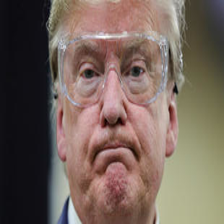

Without_Mask


In [11]:
import urllib
from keras.preprocessing import image
urllib.request.urlretrieve("https://s.france24.com/media/display/2b53680a-8f48-11ea-8e60-005056a964fe/w:310/p:16x9/_HEALTH-CORONAVIRUS-USA.jpg", "sample.jpg")
img_data=PIL.Image.open('sample.jpg')
img_data = img_data.resize((224,224))
tested_image=img_data
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
display(img_data)
if output[0][0] ==1:
  prediction = 'With_Mask'
  print(prediction )
else:
  prediction = 'Without_Mask'
  print(prediction )

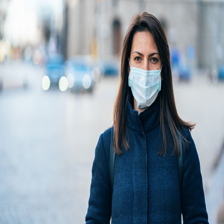

With_Mask


In [12]:
urllib.request.urlretrieve("https://www.onemedical.com/media/images/woman-wearing-mask.original.jpg", "sample.jpg")
img_data=PIL.Image.open('sample.jpg')
img_data = img_data.resize((224,224))
tested_image=img_data
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
display(img_data)
if output[0][0] ==1:
  prediction = 'With_Mask'
  print(prediction )
else:
  prediction = 'Without_Mask'
  print(prediction )